In [1]:
import pandas as pd
import numpy as np
import panel as pn
import matplotlib.pyplot as plt
from panel.interact import interact
import plotly.express as px
import hvplot.pandas
import pickle
from pathlib import Path

pn.extension("plotly")

# Output from Selection Criteria

In [8]:
# unpickling merged_df from selection_criteria.ipynb for plotting
infile = open("merged_df_pickle", "rb")
merged_df = pickle.load(infile)  #loads meged_df_pickle for use in dashboard file
infile.close()


In [9]:
merged_df.head(3)

,ticker,name,sector,sharpe ratio,P/E ratio,EPS,beta,mkt cap,shares
0,ACN,Accenture plc,Information Technology,1.113858,28.34,7.49,1.03,139515576338,656946000
1,ADBE,Adobe Systems Inc,Information Technology,0.616060,63.17,6.01,1.09,185174936969,487726000
2,AES,AES Corp,Utilities,1.182641,27.44,0.76,1.05,13895280692,663893000


Text(0, 0.5, 'Sharpe Ratio')

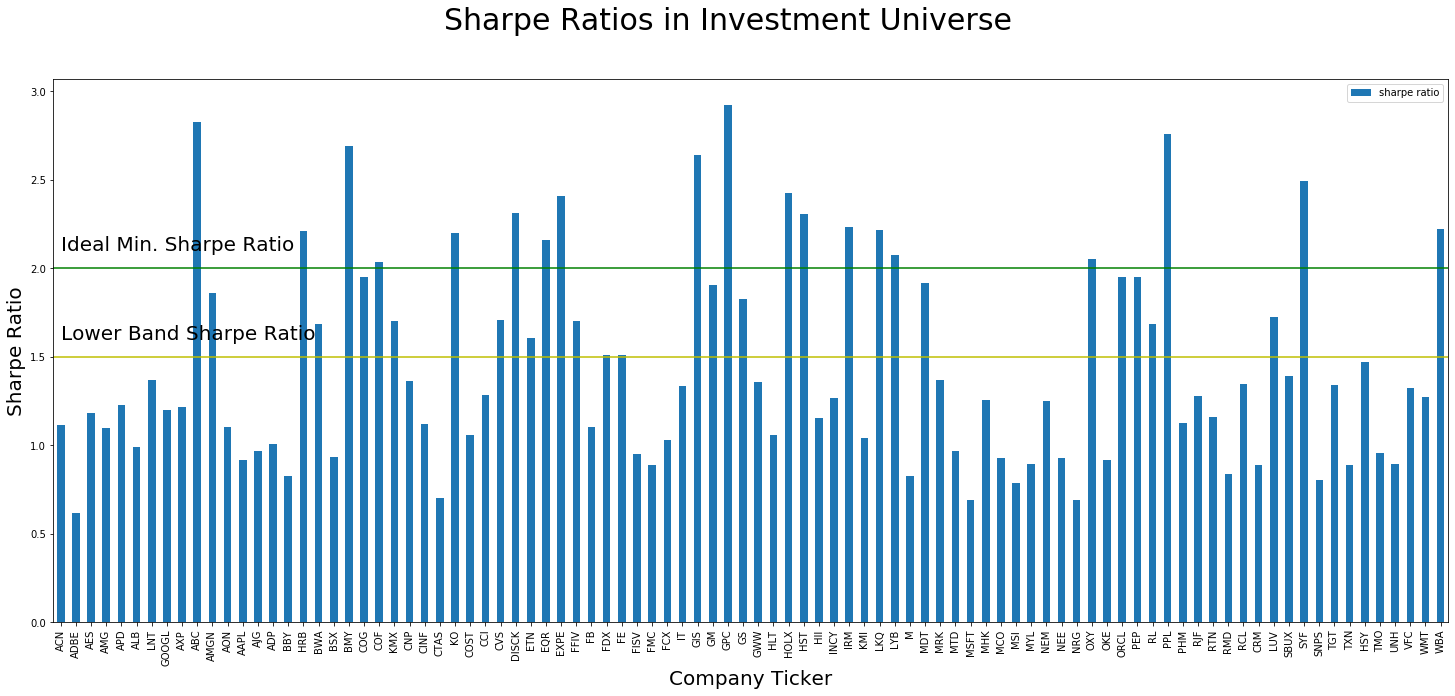

In [10]:
merged_df.plot(x='ticker',y='sharpe ratio', kind='bar', figsize=(25,10))
plt.suptitle('Sharpe Ratios in Investment Universe', fontsize=30)
plt.axhline(2, color='g')
plt.text(0,2.1,'Ideal Min. Sharpe Ratio',rotation=0,fontsize=20)
plt.axhline(1.5, color='y')
plt.text(0,1.6,'Lower Band Sharpe Ratio',rotation=0,fontsize=20)
plt.xlabel('Company Ticker',fontsize=20)
plt.ylabel('Sharpe Ratio',fontsize=20)

In [12]:
#unpickling portfolio_df from selection_criteria.ipynb for plotting
infile = open('portfolio_df_pickle', "rb")
portfolio_df = pickle.load(infile)
infile.close()

Text(0, 0.5, 'Sharpe Ratio')

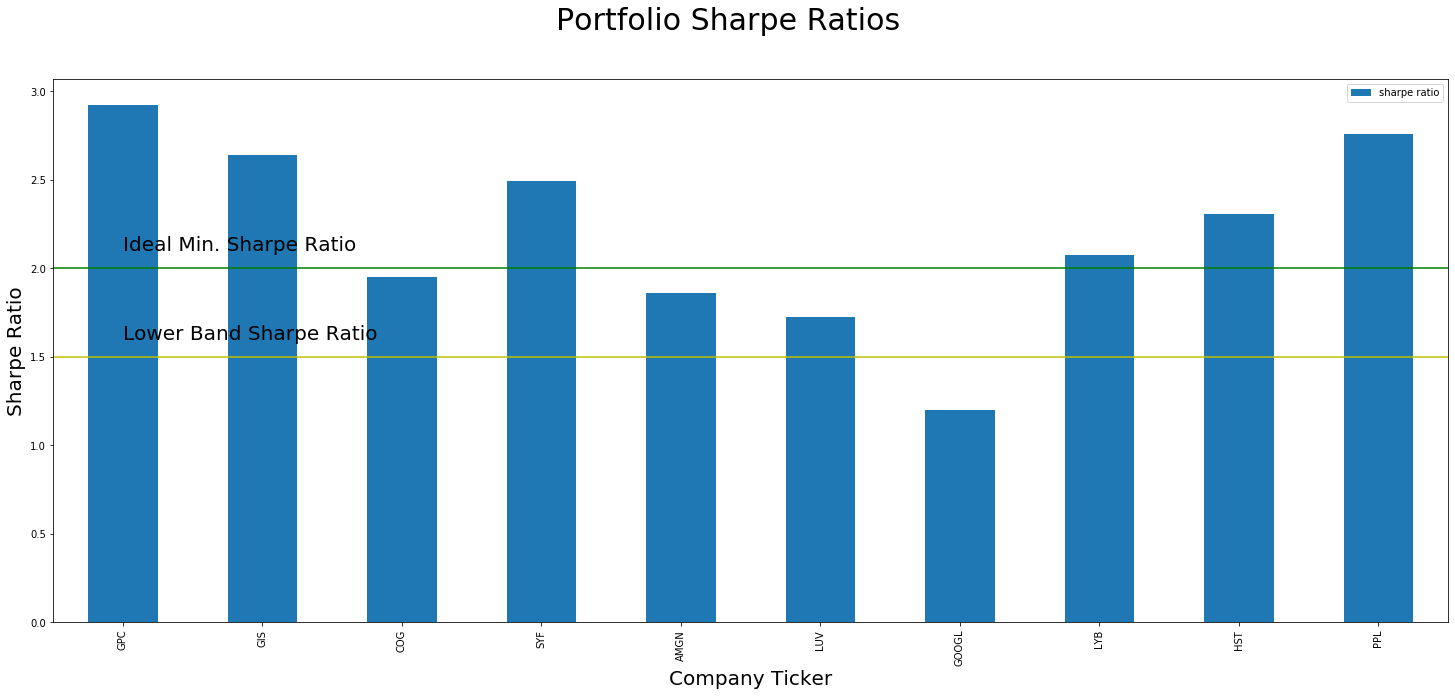

In [13]:
# plotting Sharpe Ratios for portfolio
portfolio_df.plot(x='ticker',y='sharpe ratio', kind='bar', figsize=(25,10))
plt.suptitle('Portfolio Sharpe Ratios', fontsize=30)
plt.axhline(2, color='g')
plt.text(0,2.1,'Ideal Min. Sharpe Ratio',rotation=0,fontsize=20)
plt.axhline(1.5, color='y')
plt.text(0,1.6,'Lower Band Sharpe Ratio',rotation=0,fontsize=20)
plt.xlabel('Company Ticker', fontsize=20)
plt.ylabel('Sharpe Ratio',fontsize=20)

Text(0, 0.5, 'P/E Ratio')

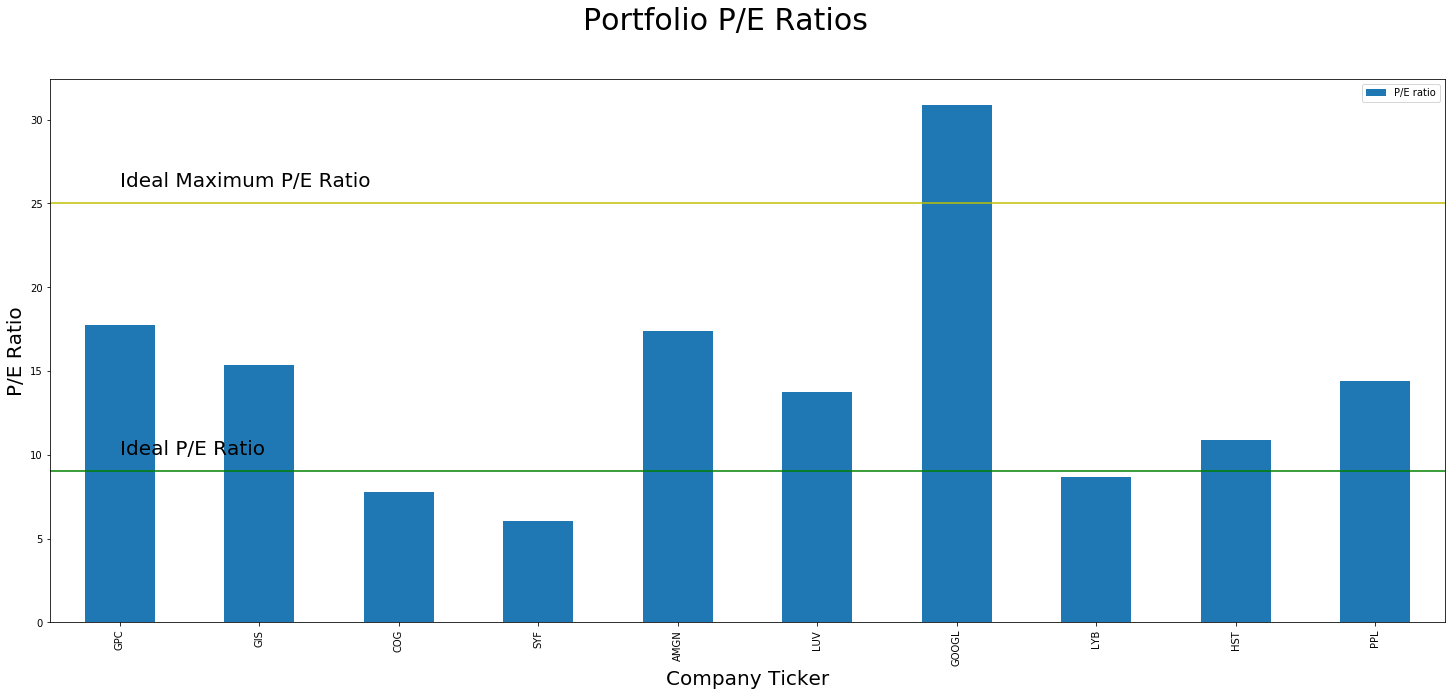

In [14]:
# plotting P/E Ratios for portfolio
portfolio_df.plot(x='ticker',y='P/E ratio', kind='bar', figsize=(25,10))
plt.suptitle('Portfolio P/E Ratios', fontsize=30)
plt.axhline(25, color='y')
plt.text(0,26,'Ideal Maximum P/E Ratio',rotation=0,fontsize=20)
plt.axhline(9, color='g')
plt.text(0,10,'Ideal P/E Ratio',rotation=0,fontsize=20)
plt.xlabel('Company Ticker', fontsize=20)
plt.ylabel('P/E Ratio',fontsize=20)

# Output from Efficient Frontier

### Unpickling output from Efficient Frontier file

In [15]:
#unpickling all_weights from Efficient_Frontier.ipynb for plotting
infile = open('all_weights_pickle', "rb")
all_weights = pickle.load(infile)
infile.close()

In [16]:
#unpickling vol_arr from Efficient_Frontier.ipynb for plotting
infile = open('Efficient_df_pickle', "rb")
Efficient_df = pickle.load(infile)
infile.close()

In [17]:
# unpickling vol_arr from Efficient_Frontier.ipynb for plotting
infile = open('vol_arr_pickle', "rb")
vol_arr = pickle.load(infile)
infile.close()

In [18]:
# unpickling ret_arr from Efficient_Frontier.ipynb for plotting
infile = open('ret_arr_pickle', "rb")
ret_arr = pickle.load(infile)
infile.close()

In [19]:
# unpickling sharpe_arr from Efficient_Frontier.ipynb for plotting
infile = open('sharpe_arr_pickle', "rb")
sharpe_arr = pickle.load(infile)
infile.close()

In [20]:
# unpickling max_sharp_return from Efficient_Frontier.ipynb for plotting
infile = open('max_sharp_return_pickle', "rb")
max_sharp_return = pickle.load(infile)
infile.close()

In [21]:
# unpickling max_sharp_vol from Efficient_Frontier.ipynb for plotting
infile = open('max_sharp_vol_pickle', "rb")
max_sharp_vol = pickle.load(infile)
infile.close()

In [22]:
# unpickling min_sharp_return from Efficient_Frontier.ipynb for plotting
infile = open('min_sharp_return_pickle', "rb")
min_sharp_return = pickle.load(infile)
infile.close()

In [23]:
# unpickling max_sharp_return from Efficient_Frontier.ipynb for plotting
infile = open('min_sharp_vol_pickle', "rb")
min_sharp_vol = pickle.load(infile)
infile.close()

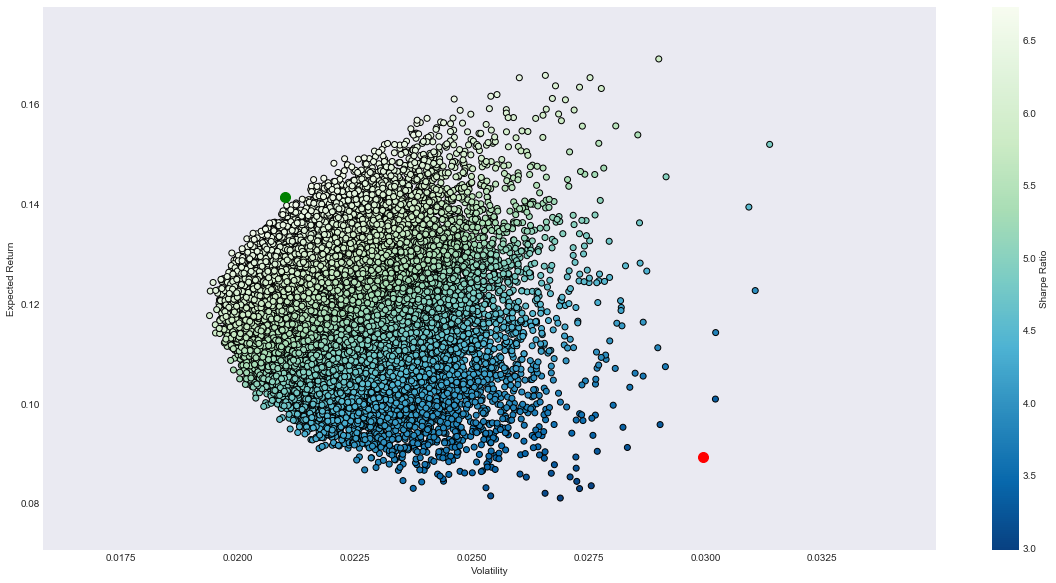

In [24]:
plt.style.use('seaborn-dark')
plt.figure(figsize=(20,10))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='GnBu_r',edgecolors='black')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.scatter(max_sharp_vol, max_sharp_return,c='green', s=100)
plt.scatter(min_sharp_vol, min_sharp_return,c='red', s=100) # red dot

    
plt.show()

In [25]:
# prints the best portfolio from above
print("The max sharpe ratio in the array: {}".format(sharpe_arr.max()))
print("The location in the array: {}".format(sharpe_arr.argmax()))

The max sharpe ratio in the array: 6.730068635408508
The location in the array: 15333


In [26]:
# print all the weights for the max array
print(all_weights[1533,:])

[0.01284361 0.20883534 0.13062883 0.15579021 0.11701665 0.18599151
 0.00738261 0.05979852 0.10464435 0.01706838]


In [31]:
# prints the worst portfolio from above
print("The min sharpe ratio in the array: {}".format(sharpe_arr.min()))
print("The location in the array: {}".format(sharpe_arr.argmin()))

The min sharpe ratio in the array: 2.9835060602225387
The location in the array: 9801


In [32]:
# print all the weights for the worst array
print(all_weights[9801,:])

[0.4154753  0.08737277 0.02717975 0.18494651 0.03159597 0.00579978
 0.0066295  0.12686745 0.03158073 0.08255224]


In [33]:
portfolio = {'Returns': ret_arr,
         'Volatility': vol_arr,
         'Sharpe Ratio': sharpe_arr}

In [34]:
df = pd.DataFrame(portfolio)
column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in Efficient_df.index]

In [35]:
df.head(10000)

,Returns,Volatility,Sharpe Ratio
0,0.106746,0.022302,4.786425
1,0.124544,0.023877,5.216096
2,0.110127,0.022093,4.984762
3,0.107323,0.022934,4.679667
4,0.101406,0.022882,4.431729
...,...,...,...
9995,0.128143,0.023390,5.478504
9996,0.108011,0.021070,5.126358
9997,0.136287,0.022131,6.158332
9998,0.120151,0.021288,5.644040


In [30]:
portfolio

{'Returns': array([0.10674591, 0.12454371, 0.11012658, ..., 0.09945508, 0.12841312,
        0.13387224]),
 'Volatility': array([0.0223018 , 0.0238768 , 0.02209265, ..., 0.0230914 , 0.02283247,
        0.02185845]),
 'Sharpe Ratio': array([4.78642493, 5.21609633, 4.98476165, ..., 4.30701917, 5.62414554,
        6.12450766])}